# Tensorflow Implementation

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Understanding the Data

In [2]:
data_dir = "./../Data/archive/Data"
os.listdir(data_dir)

['.ipynb_checkpoints',
 'Covid_detection.ipynb',
 'test',
 'train',
 'Untitled.ipynb']

In [3]:
train_path = data_dir + "/train"
test_path = data_dir + "/test"
os.listdir(train_path)

['COVID19', 'NORMAL', 'PNEUMONIA']

In [4]:
os.listdir(test_path)

['COVID19', 'NORMAL', 'PNEUMONIA']

In [5]:
os.listdir(train_path + "/COVID19")[0]

'COVID19(0).jpg'

In [6]:
covid_image_path = (train_path + "/COVID19/COVID19(0).jpg")
covid_image = imread(covid_image_path)

In [7]:
a, b = covid_image.shape

In [8]:
a

2000

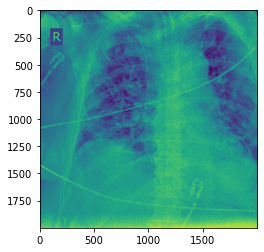

In [9]:
plt.imshow(covid_image)

In [10]:
print(len(os.listdir(train_path + "/COVID19")))
print(len(os.listdir(train_path + "/NORMAL")))
print(len(os.listdir(train_path + "/PNEUMONIA")))
print(len(os.listdir(test_path + "/COVID19")))
print(len(os.listdir(test_path + "/NORMAL")))
print(len(os.listdir(test_path + "/PNEUMONIA")))

460
1266
3418
116
317
855


In [11]:
dim1 = []
dim2 = []
channels = []
for image_file in os.listdir(train_path + "/COVID19"):
    image = imread((train_path + "/COVID19/" + image_file))
    if len(image.shape) == 2:
        d1, d2 = image.shape
        channel = 1
    else:
        d1, d2, channel = image.shape
        
    dim1.append(d1)
    dim2.append(d2)
    channels.append(channel)

    

c:\users\ushou\downloads\data science and ai\msc project\project_venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


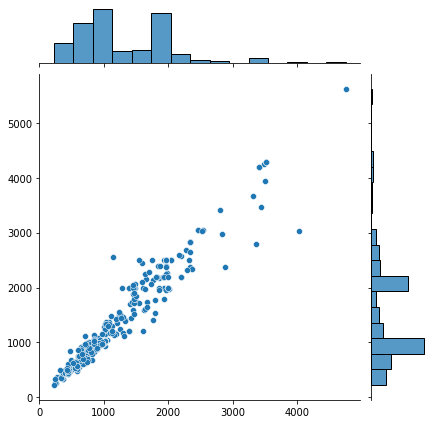

In [12]:
sns.jointplot(dim1, dim2)

In [13]:
np.mean(dim1)

1309.5586956521738

In [14]:
np.mean(dim2)

1439.7739130434782

In [15]:
np.mean(channels)

2.5391304347826087

In [3]:
image_shape = (130, 130, 3)

# Data Pre_Processing

In [17]:
img_gen = ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            rescale=1/255,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode="nearest")

In [18]:
img_gen.flow_from_directory(train_path)

Found 5144 images belonging to 3 classes.


In [19]:
img_gen.flow_from_directory(test_path)

Found 1288 images belonging to 3 classes.


In [20]:
batch_size = 16
train_img_gen = img_gen.flow_from_directory(train_path, target_size=image_shape[:2],batch_size=batch_size,
                                            color_mode="rgb", shuffle=True)

Found 5144 images belonging to 3 classes.


In [21]:
test_img_gen = img_gen.flow_from_directory(test_path, target_size=image_shape[:2],batch_size=batch_size,
                                            color_mode="rgb", shuffle=False)

Found 1288 images belonging to 3 classes.


In [22]:
test_img_gen.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

# Model 1

In [4]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(128, activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation= "softmax"))

model.compile(loss="categorical_crossentropy", optimizer = "adam",
             metrics=["accuracy"])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [26]:
early_stop = EarlyStopping(monitor="val_loss", patience=2) 

In [29]:
model.fit(train_img_gen, epochs = 10, validation_data = test_img_gen, callbacks=[early_stop])

Epoch 1/10
322/322 [==============================] - 180s 556ms/step - loss: 0.5742 - accuracy: 0.7650 - val_loss: 0.3529 - val_accuracy: 0.8688
Epoch 2/10
322/322 [==============================] - 124s 384ms/step - loss: 0.4045 - accuracy: 0.8445 - val_loss: 0.2997 - val_accuracy: 0.8944
Epoch 3/10
322/322 [==============================] - 125s 387ms/step - loss: 0.3703 - accuracy: 0.8538 - val_loss: 0.2778 - val_accuracy: 0.8890
Epoch 4/10
322/322 [==============================] - 126s 390ms/step - loss: 0.3394 - accuracy: 0.8659 - val_loss: 0.3312 - val_accuracy: 0.8766
Epoch 5/10
322/322 [==============================] - 124s 386ms/step - loss: 0.2999 - accuracy: 0.8851 - val_loss: 0.2328 - val_accuracy: 0.9208
Epoch 6/10
322/322 [==============================] - 123s 382ms/step - loss: 0.2737 - accuracy: 0.8981 - val_loss: 0.2429 - val_accuracy: 0.9161
Epoch 7/10
322/322 [==============================] - 123s 383ms/step - loss: 0.2663 - accuracy: 0.9003 - val_loss: 0.1996 -

In [30]:
model.save("Tensorflow_best_model.h5")

In [31]:
model.evaluate(test_img_gen)

81/81 [==============================] - 17s 201ms/step - loss: 0.2184 - accuracy: 0.9161


[0.21842586994171143, 0.9161490797996521]

In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
pred = model.predict(test_img_gen)

In [34]:
pred1 = np.argmax(pred, axis=-1)

In [35]:
test_labels = test_img_gen.labels

In [36]:
print(classification_report(test_labels, pred1))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       116
           1       0.81      0.90      0.85       317
           2       0.95      0.92      0.94       855

    accuracy                           0.92      1288
   macro avg       0.91      0.92      0.91      1288
weighted avg       0.92      0.92      0.92      1288



<AxesSubplot:>

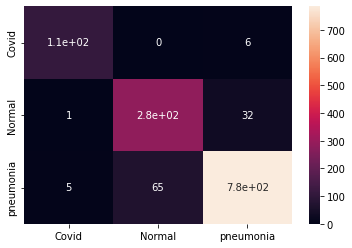

In [37]:
cm = confusion_matrix(test_labels, pred1)
sns.heatmap(cm, annot = True, xticklabels=["Covid", "Normal", "pneumonia"], yticklabels=["Covid", "Normal", "pneumonia"])

# Model 2

In [24]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model2.add(MaxPool2D())

model2.add(Flatten())

model2.add(Dense(64, activation= "relu"))
# model2.add(Dropout(0.5))
model2.add(Dense(3, activation= "softmax"))

model2.compile(loss="categorical_crossentropy", optimizer = "adam",
             metrics=["accuracy"])

In [26]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8388672   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 8,389,763
Trainable params: 8,389,763
Non-trainable params: 0
_________________________________________________________________


In [27]:
early_stop = EarlyStopping(monitor="val_loss", patience=2) 

In [28]:
model2.fit(train_img_gen, epochs = 10, validation_data = test_img_gen, callbacks=[early_stop])

Epoch 1/10
322/322 [==============================] - 130s 401ms/step - loss: 1.0114 - accuracy: 0.7115 - val_loss: 0.5101 - val_accuracy: 0.7562
Epoch 2/10
322/322 [==============================] - 154s 478ms/step - loss: 0.4449 - accuracy: 0.8215 - val_loss: 0.3717 - val_accuracy: 0.8680
Epoch 3/10
322/322 [==============================] - 192s 598ms/step - loss: 0.4050 - accuracy: 0.8427 - val_loss: 0.3179 - val_accuracy: 0.8820
Epoch 4/10
322/322 [==============================] - 186s 579ms/step - loss: 0.3694 - accuracy: 0.8583 - val_loss: 0.3318 - val_accuracy: 0.8789
Epoch 5/10
322/322 [==============================] - 194s 601ms/step - loss: 0.3622 - accuracy: 0.8544 - val_loss: 0.3308 - val_accuracy: 0.8649


In [29]:
 model2.save("Tensorflow_best_model2.h5")

In [30]:
model2.evaluate(test_img_gen)

81/81 [==============================] - 17s 209ms/step - loss: 0.3501 - accuracy: 0.8533


[0.3500637412071228, 0.85326087474823]

In [35]:
pred2 = model2.predict(test_img_gen)

In [36]:
pred2 = np.argmax(pred2, axis=-1)

In [37]:
test_labels = test_img_gen.labels

In [38]:
print(classification_report(test_labels, pred2))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       116
           1       0.70      0.92      0.80       317
           2       0.96      0.86      0.91       855

    accuracy                           0.87      1288
   macro avg       0.86      0.86      0.85      1288
weighted avg       0.89      0.87      0.87      1288



<AxesSubplot:>

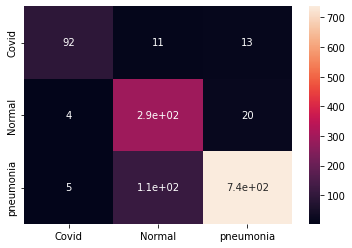

In [39]:
cm = confusion_matrix(test_labels, pred2)
sns.heatmap(cm, annot = True, xticklabels=["Covid", "Normal", "pneumonia"], yticklabels=["Covid", "Normal", "pneumonia"])

# Model 3

In [41]:
model3 = Sequential()

model3.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model3.add(MaxPool2D())

model3.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model3.add(MaxPool2D())

model3.add(Flatten())

model3.add(Dense(32, activation= "relu"))
model3.add(Dense(64, activation= "relu"))
# model.add(Dropout(0.5))
model3.add(Dense(3, activation= "softmax"))

model3.compile(loss="categorical_crossentropy", optimizer = "adam",
             metrics=["accuracy"])

In [42]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1968160   
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [43]:
model3.fit(train_img_gen, epochs = 10, validation_data = test_img_gen, callbacks=[early_stop])

Epoch 1/10
322/322 [==============================] - 118s 367ms/step - loss: 0.5847 - accuracy: 0.7558 - val_loss: 0.3925 - val_accuracy: 0.8432
Epoch 2/10
322/322 [==============================] - 117s 364ms/step - loss: 0.3860 - accuracy: 0.8501 - val_loss: 0.3868 - val_accuracy: 0.8447
Epoch 3/10
322/322 [==============================] - 120s 371ms/step - loss: 0.3505 - accuracy: 0.8569 - val_loss: 0.2725 - val_accuracy: 0.9006
Epoch 4/10
322/322 [==============================] - 118s 367ms/step - loss: 0.3109 - accuracy: 0.8802 - val_loss: 0.3298 - val_accuracy: 0.8913
Epoch 5/10
322/322 [==============================] - 120s 373ms/step - loss: 0.2990 - accuracy: 0.8880 - val_loss: 0.2545 - val_accuracy: 0.9154
Epoch 6/10
322/322 [==============================] - 120s 372ms/step - loss: 0.2760 - accuracy: 0.8941 - val_loss: 0.2573 - val_accuracy: 0.9068
Epoch 7/10
322/322 [==============================] - 120s 372ms/step - loss: 0.2793 - accuracy: 0.8952 - val_loss: 0.2342 -

In [44]:
 model3.save("Tensorflow_best_model3.h5")

In [45]:
model3.evaluate(test_img_gen)

81/81 [==============================] - 18s 212ms/step - loss: 0.2748 - accuracy: 0.8975


[0.27477937936782837, 0.8975155353546143]

In [46]:
pred3 = model3.predict(test_img_gen)

In [47]:
pred3 = np.argmax(pred3, axis=-1)

In [48]:
test_labels = test_img_gen.labels

In [49]:
print(classification_report(test_labels, pred3))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       116
           1       0.77      0.94      0.85       317
           2       0.98      0.89      0.93       855

    accuracy                           0.91      1288
   macro avg       0.89      0.93      0.90      1288
weighted avg       0.92      0.91      0.91      1288



<AxesSubplot:>

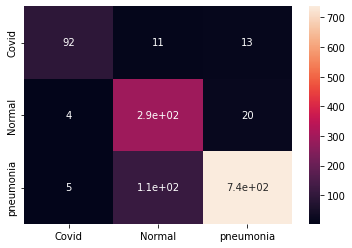

In [50]:
cm = confusion_matrix(test_labels, pred2)
sns.heatmap(cm, annot = True, xticklabels=["Covid", "Normal", "pneumonia"], yticklabels=["Covid", "Normal", "pneumonia"])

# Model 4

In [23]:
model4 = Sequential()

model4.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation="relu"))

model4.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model4.add(MaxPool2D())

model4.add(Flatten())

model4.add(Dense(512, activation= "relu"))
model4.add(Dropout(0.3))
model4.add(Dense(3, activation= "softmax"))

model4.compile(loss="categorical_crossentropy", optimizer = "adam",
             metrics=["accuracy"])

In [24]:
model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 127008)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               65028608  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [27]:
model4.fit(train_img_gen, epochs = 10, validation_data = test_img_gen, callbacks=[early_stop])

Epoch 1/10
322/322 [==============================] - 230s 714ms/step - loss: 0.5868 - accuracy: 0.7817 - val_loss: 0.4029 - val_accuracy: 0.8168
Epoch 2/10
322/322 [==============================] - 229s 710ms/step - loss: 0.4058 - accuracy: 0.8402 - val_loss: 0.3164 - val_accuracy: 0.8758
Epoch 3/10
322/322 [==============================] - 234s 728ms/step - loss: 0.3678 - accuracy: 0.8558 - val_loss: 0.2843 - val_accuracy: 0.8835
Epoch 4/10
322/322 [==============================] - 238s 738ms/step - loss: 0.3402 - accuracy: 0.8596 - val_loss: 0.2979 - val_accuracy: 0.8874
Epoch 5/10
322/322 [==============================] - 247s 768ms/step - loss: 0.3088 - accuracy: 0.8799 - val_loss: 0.2734 - val_accuracy: 0.9014
Epoch 6/10
322/322 [==============================] - 426s 1s/step - loss: 0.2942 - accuracy: 0.8865 - val_loss: 0.2772 - val_accuracy: 0.8967
Epoch 7/10
322/322 [==============================] - 514s 2s/step - loss: 0.2747 - accuracy: 0.8917 - val_loss: 0.2334 - val_a

In [28]:
 model4.save("Tensorflow_best_model3.h5")

In [29]:
model4.evaluate(test_img_gen)

81/81 [==============================] - 20s 241ms/step - loss: 0.2217 - accuracy: 0.9123


[0.22170093655586243, 0.9122670888900757]

In [30]:
pred4 = model4.predict(test_img_gen)

In [31]:
pred4 = np.argmax(pred4, axis=-1)

In [32]:
test_labels = test_img_gen.labels

In [35]:
print(classification_report(test_labels, pred4))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       116
           1       0.84      0.88      0.86       317
           2       0.94      0.94      0.94       855

    accuracy                           0.92      1288
   macro avg       0.92      0.88      0.90      1288
weighted avg       0.92      0.92      0.92      1288



<AxesSubplot:>

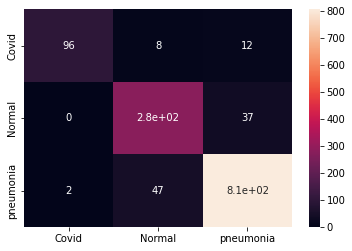

In [34]:
cm = confusion_matrix(test_labels, pred4)
sns.heatmap(cm, annot = True, xticklabels=["Covid", "Normal", "pneumonia"], yticklabels=["Covid", "Normal", "pneumonia"])